In [45]:
from os import chdir as cd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/'
file = 'HearingMeHearingYou_Data.csv'

cd(pathin)

df = pd.read_csv(file)

In [7]:
df.head()

,ChildID,Visit,ASD,Gender,Age,ADOS,MSEL_EL,MSEL_VR,ChildMLU,ChildTokens,ChildTypes,ParentMLU,ParentTokens,ParentTypes,SharedType
0,1,1,0,Male,19.80,0,14,28,1.337349,194,19,3.671821,2417,478,5
1,1,2,0,Male,23.93,0,14,28,1.009009,223,18,3.913793,2762,516,2
2,1,3,0,Male,27.70,0,14,28,1.570370,481,98,4.405063,3215,472,80
3,1,4,0,Male,32.90,0,14,28,2.047619,438,150,4.475936,2814,654,75
4,1,5,0,Male,35.90,0,14,28,3.000000,640,208,5.284615,3075,708,130


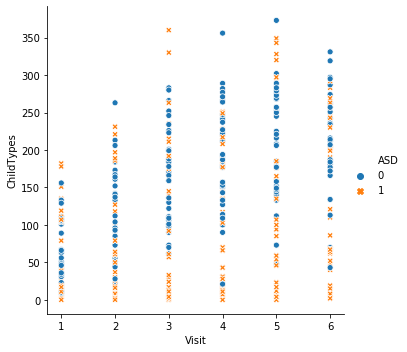

In [8]:
sns.relplot(x="Visit", y="ChildTypes", hue="ASD", style="ASD",
            data=df);

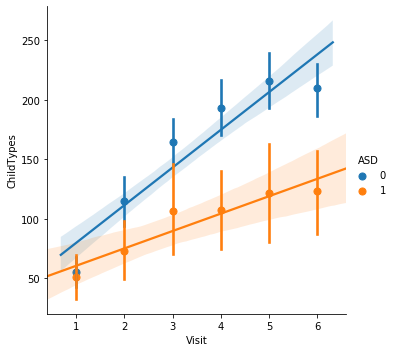

In [9]:
sns.lmplot(x="Visit", y="ChildTypes", hue="ASD", data=df, x_estimator=np.mean);

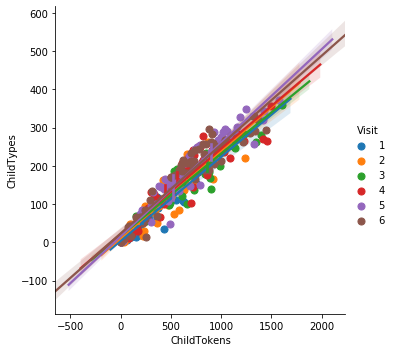

In [10]:
sns.lmplot(x="ChildTokens", y="ChildTypes", hue="Visit", data=df, x_estimator=np.mean)

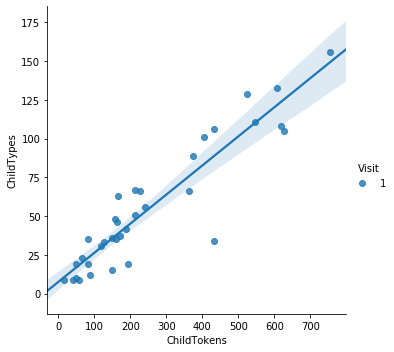

In [16]:
sns.lmplot(x="ChildTokens", y="ChildTypes", hue="Visit", 
           data=df[(df['ASD']  == 0) & (df['Visit'] == 1)])

In [18]:
df.head()

,ChildID,Visit,ASD,Gender,Age,ADOS,MSEL_EL,MSEL_VR,ChildMLU,ChildTokens,ChildTypes,ParentMLU,ParentTokens,ParentTypes,SharedType
0,1,1,0,Male,19.80,0,14,28,1.337349,194,19,3.671821,2417,478,5
1,1,2,0,Male,23.93,0,14,28,1.009009,223,18,3.913793,2762,516,2
2,1,3,0,Male,27.70,0,14,28,1.570370,481,98,4.405063,3215,472,80
3,1,4,0,Male,32.90,0,14,28,2.047619,438,150,4.475936,2814,654,75
4,1,5,0,Male,35.90,0,14,28,3.000000,640,208,5.284615,3075,708,130


In [19]:
df.describe()

,ChildID,Visit,ASD,Age,ADOS,MSEL_EL,MSEL_VR,ChildMLU,ChildTokens,ChildTypes,ParentMLU,ParentTokens,ParentTypes,SharedType
count,395.000000,395.000000,395.000000,389.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,33.941772,3.478481,0.470886,36.355578,7.078481,18.886076,26.440506,2.024791,499.149367,129.443038,3.986386,2302.005063,451.681013,58.967089
std,19.298198,1.711833,0.499785,10.132195,7.246313,6.261208,4.516566,0.849913,384.575236,95.200129,0.708453,689.460725,109.483742,50.544060
min,1.000000,1.000000,0.000000,18.300000,0.000000,8.000000,13.000000,0.000000,0.000000,0.000000,1.856115,188.000000,78.000000,0.000000
25%,17.000000,2.000000,0.000000,28.530000,0.000000,14.000000,24.000000,1.300000,152.000000,40.000000,3.584601,1850.500000,384.000000,8.000000
50%,34.000000,3.000000,0.000000,35.900000,5.000000,18.000000,27.000000,1.919643,475.000000,127.000000,4.048333,2266.000000,453.000000,51.000000
75%,50.500000,5.000000,1.000000,42.630000,14.000000,22.000000,29.000000,2.668776,753.500000,202.000000,4.392994,2800.500000,520.500000,103.000000
max,67.000000,6.000000,1.000000,62.400000,21.000000,33.000000,42.000000,4.601942,1608.000000,373.000000,5.879004,4225.000000,739.000000,205.000000


In [28]:
# linear regression: Does ChildTokens predict ChildTypes in Visit 1 in TD children?
import statsmodels.api as sm
data = df[(df['ASD']  == 0) & (df['Visit'] == 1)]
y = data['ChildTypes']
x1 = data['ChildTokens']
x = sm.add_constant(x1)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ChildTypes   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     196.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.93e-15
Time:                        16:34:31   Log-Likelihood:                -145.04
No. Observations:                  35   AIC:                             294.1
Df Residuals:                      33   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.5876      4.308      1.761      0.087      -1.176      16.351
ChildTokens     0.1879      0.013     14.005      0.000       0.161       0.215
==============================================================================
Omnibus:                       15.342   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.549
Skew:                          -1.207   Prob(JB):                     5.69e-05
Kurtosis:                       5.754   Cond. No.                         521.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
import statsmodels.formula.api as smf

df1=df[(df['Visit']  == 1)]
df1['ASD'] = pd.Categorical(df1.ASD)

mod = smf.ols(formula = 'ChildTypes ~ ChildTokens + ASD', data = df1).fit()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ChildTypes   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     286.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.14e-32
Time:                        17:19:34   Log-Likelihood:                -276.71
No. Observations:                  67   AIC:                             559.4
Df Residuals:                      64   BIC:                             566.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3856      3.513     -0.394      0.695      -8.404       5.633
ASD[T.1]        9.6277      3.807      2.529      0.014       2.022      17.234
ChildTokens     0.2234      0.009     23.922      0.000       0.205       0.242
==============================================================================
Omnibus:                       15.991   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.447
Skew:                          -0.567   Prob(JB):                     2.23e-10
Kurtosis:                       6.826   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

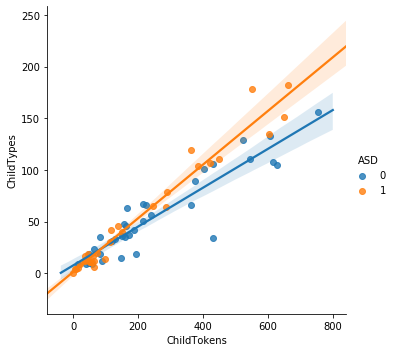

In [66]:
sns.lmplot(x="ChildTokens", y="ChildTypes", hue="ASD", 
           data=df1)